In [23]:
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

import seaborn as sns

### #1

In [24]:
iris = sns.load_dataset('iris')
df_iris = pd.DataFrame(iris)
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [25]:
df_iris.shape

(150, 5)

In [26]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [27]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [28]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


No I wouldn't rescale based on this data, it appears to be appropriate data

### #2

In [29]:
telco = pd.read_csv('Excel_Exercises.csv')
df_excel = pd.DataFrame(telco)
df_excel

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No


In [30]:
df_excel_sample = df_excel.head(100)
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No


In [31]:
df_excel.shape[0]

7049

In [32]:
df_excel.iloc[: 5]

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [33]:
list(df_excel.select_dtypes(['object']).columns)

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [34]:
numbers_only = df_excel.select_dtypes(np.number)
df_range = numbers_only.max() - numbers_only.min()
df_range

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

In [35]:
google = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv&usp=sharing'
    
df_google = pd.read_csv(google)

df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [37]:
df_google.shape

(891, 12)

In [38]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [42]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_titanic_data():
    return pd.DataFrame(pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db')))

get_titanic_data().head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [43]:
def get_iris_data():
    return pd.DataFrame(pd.read_sql('SELECT * FROM measurements JOIN species on measurements.species_id = species.species_id', get_connection('iris_db')))
get_iris_data().head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [44]:
import os

def my_titanic_data():
    filename = "titanic.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        df = pd.DataFrame(pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db')))
        df.to_csv(filename, index = False)
        return df
my_titanic_data().head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [45]:
import os

def my_iris_data():
    filename = "iris.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        df = pd.DataFrame(pd.read_sql('SELECT * FROM species', get_connection('iris_db')))
        df.to_csv(filename, index = False)
        return df
my_iris_data().head()

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import acquire

In [124]:
iris = acquire.get_iris_data()
iris = iris.drop(columns={'measurement_id', 'species_id'})
iris = iris[~ iris.sepal_length.isna()]
iris = iris[~ iris.sepal_width.isna()]
iris = iris[~ iris.petal_length.isna()]
iris = iris[~ iris.petal_width.isna()]
iris = iris.rename(columns = {'species_name' : 'species'})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [125]:
train, validate, test = np.split(iris.sample(frac=1), [int(.6*len(iris)), int(.8*len(iris))])

In [126]:
train = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']]

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
19,5.1,3.8,1.5,0.3,setosa
40,5.0,3.5,1.3,0.3,setosa
36,5.5,3.5,1.3,0.2,setosa
90,5.5,2.6,4.4,1.2,versicolor
83,6.0,2.7,5.1,1.6,versicolor


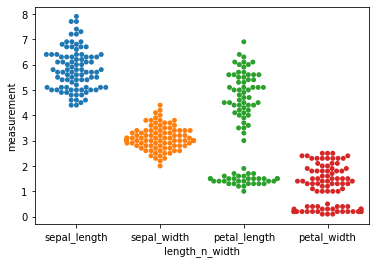

In [127]:
train_melt = train.melt(id_vars= 'species', var_name= 'length_n_width', value_name= 'measurement')
sns.swarmplot(data=train_melt, y='measurement', x='length_n_width')

In [135]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
19,5.1,3.8,1.5,0.3,setosa,19.38,0.45
40,5.0,3.5,1.3,0.3,setosa,17.50,0.39
36,5.5,3.5,1.3,0.2,setosa,19.25,0.26
90,5.5,2.6,4.4,1.2,versicolor,14.30,5.28
83,6.0,2.7,5.1,1.6,versicolor,16.20,8.16


[Text(0.5, 1.0, 'Sepal Area vs Petal Area')]

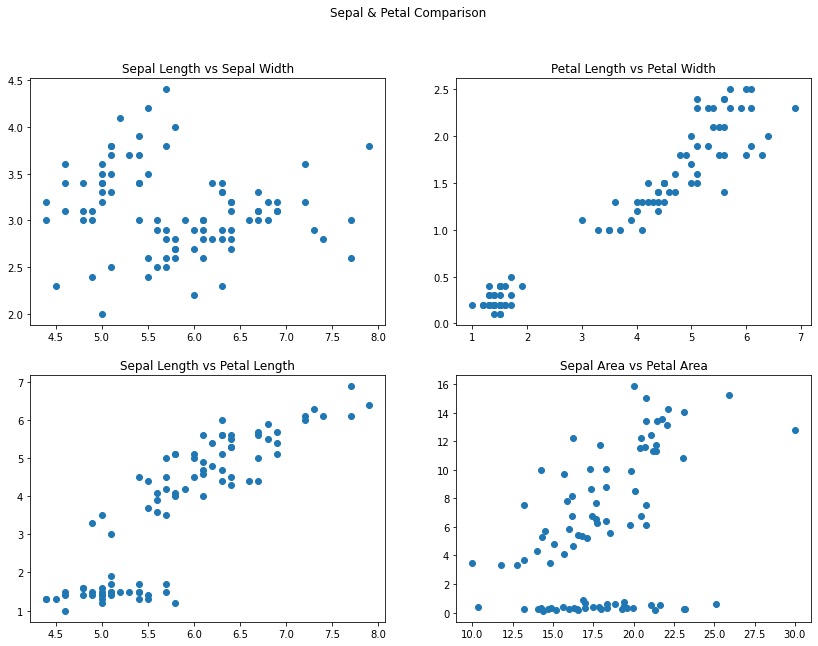

In [150]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Sepal & Petal Comparison')
axs[0, 0].scatter(train.sepal_length, train.sepal_width)
axs[0, 0].set(title="Sepal Length vs Sepal Width")
axs[0, 1].scatter(train.petal_length, train.petal_width)
axs[0, 1].set(title="Petal Length vs Petal Width")
axs[1, 0].scatter(train.sepal_length, train.petal_length)
axs[1, 0].set(title="Sepal Length vs Petal Length")
axs[1, 1].scatter(train.sepal_area, train.petal_area)
axs[1, 1].set(title="Sepal Area vs Petal Area")

# Takeaways
##Petal length and petal width as well as sepal length and petal length are somewhat correlated based on the scatterplots.

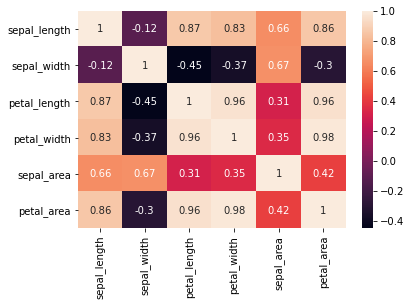

In [165]:
sns.heatmap(train.corr(), annot=True)